## 图像增强、频域滤波和边缘检测

--------------------------------------------------------------------------------------------------------------------------
#### 1. 实现以下图像的增强算法：
- 线性拉伸：`linear_stretch`
- 直方图均衡化：`histogram_equalization`。
--------------------------------------------------------------------------------------------------------------------------
#### 2. 实现以下边缘检测算子：
- roberts算子：`roberts`。
- sobel算子：`sobel`。
- prewitt算子：`prewitt`。
- laplacian算子：`laplacian`。
--------------------------------------------------------------------------------------------------------------------------
#### 3. 实现Butterworth频域滤波器
--------------------------------------------------------------------------------------------------------------------------
#### 4. 卷积定理的验证：
- 对于给定的`test.jpg`图像和两个方向的滤波算子，分别使用空间域卷积和频域滤波的方法对图像进行滤波，比较两种方法的运行结果。
--------------------------------------------------------------------------------------------------------------------------
**注意：** 在本次作业中无需自行实现傅立叶变换和傅立叶逆变换，可以直接调用`numpy.fft.fft2`和`numpy.fft.ifft2`函数。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

### 1 图像增强
#### 1-1 线性拉伸（10）
- 对图像进行分段线性拉伸。
- 函数原型：`linear_stretch(img, a, b, c, d)`，其中`a`、`b`为拉伸的两个分段点，`c`、`d`为拉伸后的两个分段点，返回拉伸后的图像。
  

In [2]:
def linear_stretch(img, a, b, c, d):
    '''
    Args:
        img: np.array, image to be stretched
        a: int, first point of the linear function
        b: int, second point of the linear function
        c: int, value of the first point after stretching
        d: int, value of the second point after stretching
    Returns:
        img: np.array, image after linear stretching
        histogram: np.array, histogram of the image after linear stretching
    '''
    img = img.astype(np.float32)
    result = np.zeros_like(img)

    result[img <= a] = (img[img <= a] * c / a)
    result[(img > a) & (img <= b)] = (img[(img > a) & (img <= b)] - a) * (d - c) / (b - a) + c
    result[img > b] = (img[img > b] - b) * (255 - d) / (255 - b) + d

    histogram, _ = np.histogram(result, 256, [0, 256])
    return result.astype(np.uint8), histogram


#### 1-2 直方图均衡化（20）
- 将图像的灰度值进行均衡化，使得图像的灰度值分布更加均匀。
- 函数原型：`hist_equalization(img)`，其中img为输入图像，返回值为均衡化后的图像、均衡化前的直方图和均衡化后的直方图。

In [3]:
def histogram_equalization(img):
    '''
    Args:
        img: np.array, image to be equalized
    Returns:
        img: np.array, image after histogram equalization
        ori_hist: np.array, original histogram
        new_hist: np.array, equalized histogram
    '''
    ori_hist, _ = np.histogram(img.flatten(), 256, [0, 256])
    
    cdf = ori_hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype(np.uint8)
    img_equalized = cdf_normalized[img]

    new_hist, _ = np.histogram(img_equalized.flatten(), 256, [0, 256])
    return img_equalized, ori_hist, new_hist


#### 1-3 展示线性拉伸和直方图均衡化的结果
- 对`cat.png`进行线性拉伸和直方图均衡化，展示结果。
- `无需改动以下代码，直接运行即可。`

Text(0.5, 1.0, 'Histogram Equalized Histogram')

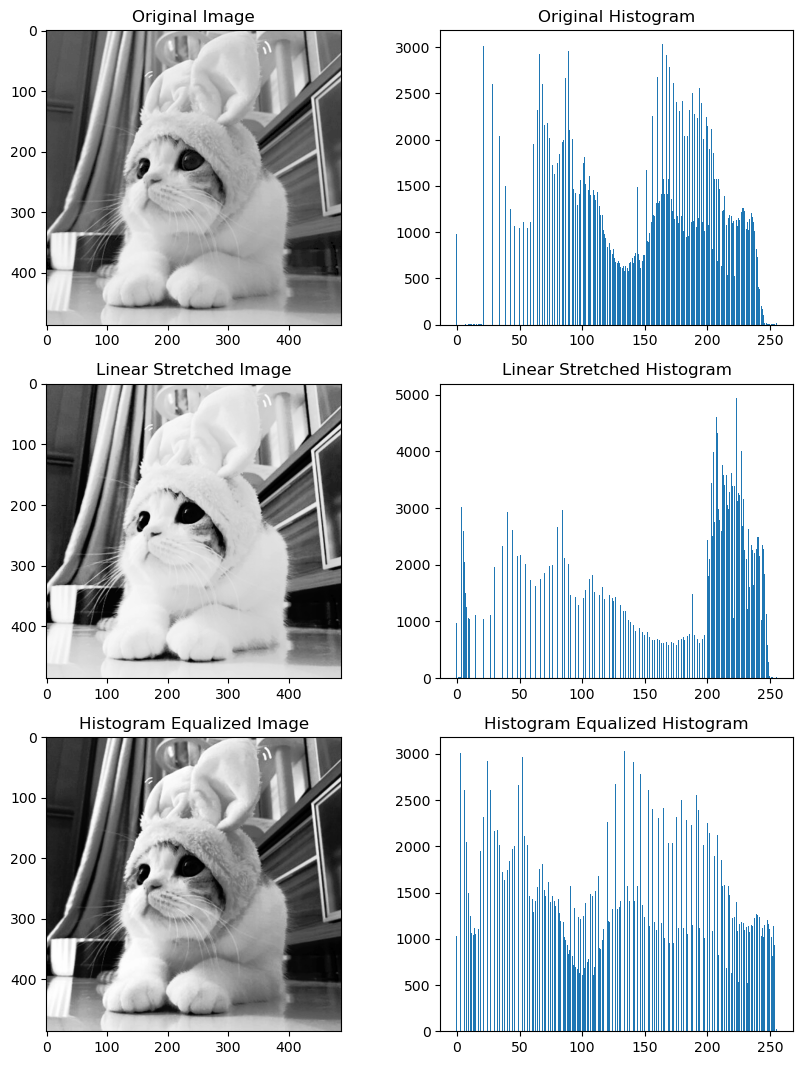

In [4]:
cat = cv2.imread('cat.png', cv2.IMREAD_GRAYSCALE)
cat_linear, stretched_hist = linear_stretch(cat, 50, 150, 10, 200)
cat_equalized, ori_hist, new_hist = histogram_equalization(cat)
plt.figure(figsize=(10, 13))
plt.subplot(321)
plt.imshow(cat, cmap='gray')
plt.title('Original Image')
plt.subplot(322)
plt.bar(np.arange(256), ori_hist)
plt.title('Original Histogram')
plt.subplot(323)
plt.imshow(cat_linear, cmap='gray')
plt.title('Linear Stretched Image')
plt.subplot(324)
plt.bar(np.arange(256), stretched_hist)
plt.title('Linear Stretched Histogram')
plt.subplot(325)
plt.imshow(cat_equalized, cmap='gray')
plt.title('Histogram Equalized Image')
plt.subplot(326)
plt.bar(np.arange(256), new_hist)
plt.title('Histogram Equalized Histogram')


### 2 边缘检测（20）
- 实现以下边缘检测算子：
    - roberts算子：`roberts`（5）
    - sobel算子：`sobel`（5）
    - prewitt算子：`prewitt`（5）
    - laplacian算子：`laplacian`（5）


#### 2-1 roberts算子（5）
- 实现roberts算子，函数原型：`roberts(img, threshold)`，其中img为输入图像，threshold为阈值，返回值为roberts算子检测到的边缘图像。

In [5]:
def roberts(img, threshold):
    '''
    Args:
        img: np.array, image to be processed
        threshold: int, threshold for binarization
    Returns:
        edge: np.array, image after roberts edge detection
    '''
    img_pad = np.pad(img, ((0, 1), (0, 1)), mode='constant', constant_values=0)
    edge = np.zeros_like(img)
    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            edge_x = np.sum(kernel_x * img_pad[i:i + 2, j:j + 2])
            edge_y = np.sum(kernel_y * img_pad[i:i + 2, j:j + 2])
            edge[i, j] = np.sqrt(edge_x ** 2 + edge_y ** 2) 
    '''
    edge_x = cv2.filter2D(img, -1, kernel_x)
    edge_y = cv2.filter2D(img, -1, kernel_y)
    edge = np.sqrt(edge_x ** 2 + edge_y ** 2)
    '''
    edge = np.where(edge > threshold, 255, 0).astype(np.uint8)
    return edge


#### 2-2 prewitt算子（5）
- 实现prewitt算子，函数原型：`prewitt(img, threshold)`，其中img为输入图像，threshold为阈值，返回值为prewitt算子检测到的边缘图像。

In [6]:
def prewitt(img, threshold):
    '''
    Args:
        img: np.array, image to be processed
        threshold: int, threshold for binarization
    Returns:
        edge: np.array, image after prewitt edge detection
    '''
    img_pad = np.pad(img, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    edge = np.zeros_like(img)
    kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            edge_x = np.sum(kernel_x * img_pad[i:i + 3, j:j + 3])
            edge_y = np.sum(kernel_y * img_pad[i:i + 3, j:j + 3])
            edge[i, j] = np.sqrt(edge_x ** 2 + edge_y ** 2) # 两个i,j在edge和img_pad图像中的位置不同，edge[i, j]是九宫格的中心
    '''
    edge_x = cv2.filter2D(img, -1, kernel_x)
    edge_y = cv2.filter2D(img, -1, kernel_y)
    edge = np.sqrt(edge_x ** 2 + edge_y ** 2)
    '''
    edge = np.where(edge > threshold, 255, 0).astype(np.uint8)
    return edge


#### 2-3 sobel算子（5）
- 实现sobel算子，函数原型：`sobel(img, threshold)`，其中img为输入图像，threshold为阈值，返回值为sobel算子检测到的边缘图像。

In [7]:
def sobel(img, threshold):
    '''
    Args:
        img: np.array, image to be processed
        threshold: int, threshold for binarization
    Returns:
        edge: np.array, image after sobel edge detection
    '''
    img_pad = np.pad(img, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    edge = np.zeros_like(img)
    kernel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            edge_x = np.sum(kernel_x * img_pad[i:i + 3, j:j + 3])
            edge_y = np.sum(kernel_y * img_pad[i:i + 3, j:j + 3])
            edge[i, j] = np.sqrt(edge_x ** 2 + edge_y ** 2) # 两个i,j在edge和img_pad图像中的位置不同，edge[i, j]是九宫格的中心
    '''    
    edge_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    edge_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    edge = np.sqrt(edge_x ** 2 + edge_y ** 2)
    '''
    edge = np.where(edge > threshold, 255, 0).astype(np.uint8)
    return edge

#### 2-4 laplacian算子 （5）
- 实现laplacian算子，函数原型：`laplacian(img, threshold)`，其中img为输入图像，threshold为阈值，返回值为laplacian算子检测到的边缘图像。

In [8]:
def laplacian(img, threshold):
    '''
    Args:
        img: np.array, image to be processed
        threshold: int, threshold for binarization
    Returns:
        edge: np.array, image after laplacian edge detection
    '''
    laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
    img_pad = np.pad(img, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    edge =np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            edge[i, j] = np.abs(np.sum(laplacian_kernel * img_pad[i:i + 3, j:j + 3]))
    '''
    edge = cv2.Laplacian(img, cv2.CV_64F)
    edge = np.abs(edge)
    '''
    edge = np.where(edge > threshold, 255, 0).astype(np.uint8)
    return edge


#### 2-5 边缘检测可视化
##### 2-5-1 边缘检测函数
-`无需改动以下代码，直接运行即可。`

In [9]:
def edge_detection(img, method, threshold):
    """
    边缘检测
    :param img: 输入图像
    :param method: 检测算子
    :return: 检测结果
    """
    if method == 'roberts':
        return roberts(img, threshold)
    elif method == 'prewitt':
        return prewitt(img, threshold)
    elif method == 'sobel':
        return sobel(img, threshold)
    elif method == 'laplacian':
        return laplacian(img, threshold)
    else:
        raise ValueError('No such method!')

##### 2-5-2 展示边缘检测的结果
- 对`test.png`进行边缘检测，展示结果。
- `无需改动以下代码，直接运行即可。`
- 该单元格可能运行较慢，请耐心等待。

Text(0.5, 1.0, 'Laplacian Edge Detection')

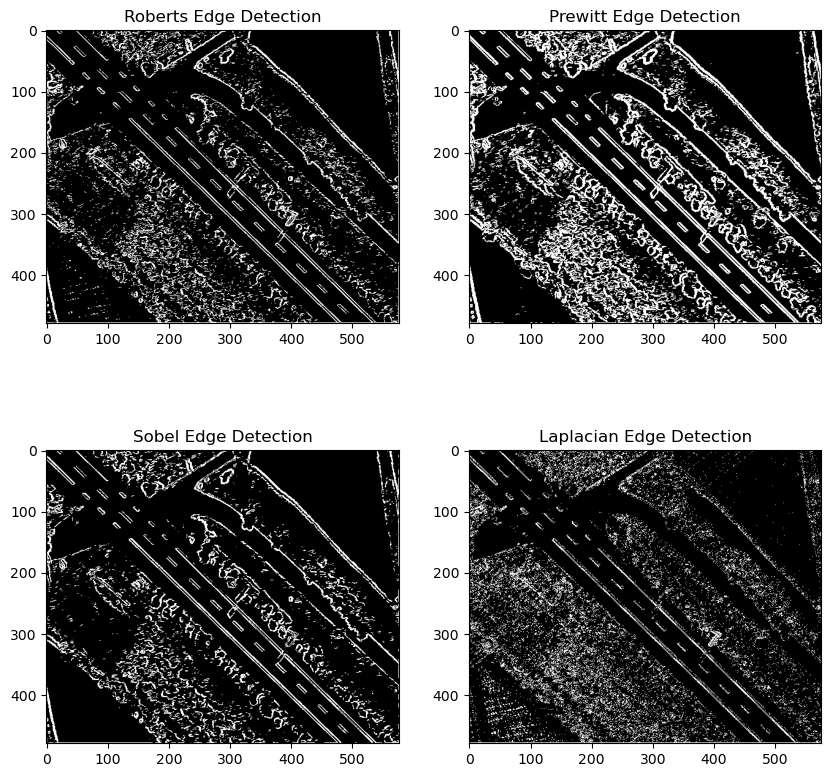

In [10]:
img = cv2.imread('test.png', cv2.IMREAD_GRAYSCALE)
roberts_img = edge_detection(img, 'roberts', 20)
prewitt_img = edge_detection(img, 'prewitt', 50)
sobel_img = edge_detection(img, 'sobel', 100)
laplacian_img = edge_detection(img, 'laplacian', 20)
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(roberts_img, cmap='gray')
plt.title('Roberts Edge Detection')
plt.subplot(222)
plt.imshow(prewitt_img, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.subplot(223)
plt.imshow(sobel_img, cmap='gray')
plt.title('Sobel Edge Detection')
plt.subplot(224)
plt.imshow(laplacian_img, cmap='gray')
plt.title('Laplacian Edge Detection')  

### 3 Butterworth滤波器（20）
- 实现Butterworth滤波器，函数原型：`butterworth_highpass_filter(img, d0, n, is_high)`，其中img为输入图像，d0为截止频率，n为阶数，is_high为True时为高通滤波，False时为低通滤波，返回值为滤波后的图像。
#### 3-1 Butterworth滤波器实现

In [11]:
def butterworth(img, d0, n, is_high=True):
    '''
    Args:
        img: np.array, image to be processed
        d0: int, cutoff frequency
        n: int, order of butterworth filter
    Returns:
        img_filtered: np.array, image after butterworth low pass filter
        butterworth_filter: np.array, butterworth filter mask
    '''
    h, w = img.shape
    center_y, center_x = h // 2, w // 2
    y, x = np.ogrid[:h, :w]
    d_uv = np.sqrt((y - center_y)**2 + (x - center_x)**2)
    butterworth_filter = 1 / (1 + (d_uv / d0) ** (2 * n))
    if is_high:
        butterworth_filter = 1 - butterworth_filter
    
    img_fft = np.fft.fft2(img)
    img_fft_shift = np.fft.fftshift(img_fft)
    filter_fft = img_fft_shift * butterworth_filter
    img_filtered = np.abs(np.fft.ifft2(np.fft.ifftshift(filter_fft)))

    return img_filtered, butterworth_filter


#### 3-2 Butterworth滤波器效果可视化
- `无需改动以下代码，直接运行即可。`

Text(0.5, 1.0, 'Butterworth Low Pass Filter Mask')

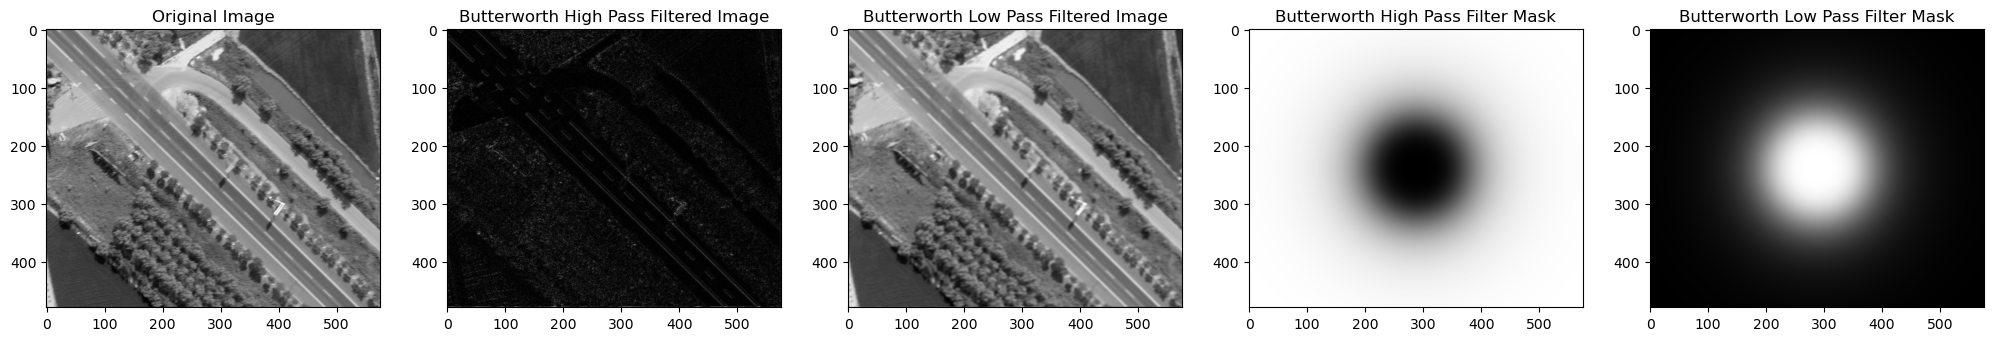

In [12]:
butterworth_high,high_mask = butterworth(img, 100, 2, True)
butterworth_low,low_mask = butterworth(img, 100, 2, False)
plt.figure(figsize=(25, 13))
plt.subplot(151)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(152)
plt.imshow(butterworth_high, cmap='gray')
plt.title('Butterworth High Pass Filtered Image')
plt.subplot(153)
plt.imshow(butterworth_low, cmap='gray')
plt.title('Butterworth Low Pass Filtered Image')
plt.subplot(154)
plt.imshow(high_mask, cmap='gray')
plt.title('Butterworth High Pass Filter Mask')
plt.subplot(155)
plt.imshow(low_mask, cmap='gray')
plt.title('Butterworth Low Pass Filter Mask')


### 4 卷积定理的验证（30）
- 对于给定的`test.jpg`图像和两个方向的滤波算子`f_x`和`f_y`，分别使用空间域卷积和频域滤波的方法对图像进行滤波，比较两种方法的运行结果。
- $$f_x=\begin{bmatrix}1&-1\end{bmatrix},f_y=\begin{bmatrix}1\\-1\end{bmatrix}$$


#### 4-1 空域卷积 （10）
- 将`f_x`和`f_y`分别与`test.jpg`进行卷积，并将两次卷积的结果的绝对值进行叠加，得到最终的结果。
- 函数原型：`spatial_convolution(img, f_x, f_y)`，其中img为输入图像，f_x和f_y为输入的滤波算子，返回值为滤波结果。
- **提示：** 可以使用cv2.filter2D函数进行空间域卷积，形式如cv2.filter2D(img, -1, f_x)，无需自行实现卷积。

In [13]:
def spatial_conv(img, f_x, f_y):
    '''
    Args:
        img: np.array, image to be processed
        f_x: np.array, x direction filter
        f_y: np.array, y direction filter
    Returns:
        img_filtered: np.array, image after spatial convolution
    '''
    conv_x = cv2.filter2D(img, -1, f_x)
    conv_y = cv2.filter2D(img, -1, f_y)
    return np.abs(conv_x) + np.abs(conv_y)


#### 4-2 频域滤波 （10）
- 对于频域滤波，将`test.jpg`进行傅立叶变换，将`f_x`和`f_y`进行傅立叶变换后得到`F_x`和`F_y`，将两个滤波算子的傅立叶变换结果进行叠加，再将叠加后的结果与`test.jpg`的傅立叶变换结果进行点乘，最后将点乘的结果进行傅立叶逆变换，得到最终的结果,返回`滤波结果`以及将`原点平移到图像中心`的`F_x`和`F_y`。
- **注意：** 在本次作业中无需自行实现傅立叶变换和傅立叶逆变换，可以直接调用`numpy.fft.fft2`和`numpy.fft.ifft2`函数。
- **提示：** `numpy.fft.fft2`函数可以指定输出的尺寸，可以使用此函数将傅立叶变换后的滤波算子的尺寸扩展到与图像相同。形式如np.fft.fft2(img, (h, w))，其中img为输入滤波器，(h, w)为输出图像的尺寸。

In [14]:
def frequency_filter(img,f_x,f_y):
    '''
    Args:
        img: np.array, image to be processed
        f_x: np.array, x direction filter
        f_y: np.array, y direction filter
    Returns:
        img_filtered: np.array, image after frequency filtering
        F_x_shift: np.array, shifted fourier transform of f_x
        F_y_shift: np.array, shifted fourier transform of f_y
    '''
    h, w = img.shape
    F_x = np.fft.fft2(f_x, (h, w))
    F_y = np.fft.fft2(f_y, (h, w))
    img_fft = np.fft.fft2(img)

    F_x_shift = np.fft.fftshift(F_x)
    F_y_shift = np.fft.fftshift(F_y)

    filtered_fft = img_fft * (F_x + F_y)
    img_filtered = np.abs(np.fft.ifft2(filtered_fft))
    return img_filtered, F_x_shift, F_y_shift



#### 4-3 卷积定理的验证（10）
- `无需改动以下代码，直接运行即可。`
- **证明：** 通过实验结果的观察，`f_x`和`f_y`相当于对图像进行了水平和垂直方向的一阶差分，这种操作在频率域相当于高通滤波还是低通滤波？通过`数学推导`证明（证明一维即可，无需证明二维）。（10）
- **`[提示]`**:求$f_x$在频率域的传递函数$H_x$，并分析$H_x$的特性，从而得出$f_x$在频率域的作用。
- **注意：** 空域卷积与频域滤波的结果从视觉上应该差别不大，如果差别较大，说明实现有问题，但由于实现的方法不同，两种方法得到的结果可能会有细微的差别，这是正常的。
- **注意：** 如果熟悉markdown语法，数学推导的过程可以写在下面的`实验收获与感悟`中，也可以单独写在`conv.pdf`中一同提交，`conv.pdf`应与本记事本和实验应用的图像文件放在同一目录下。

Text(0.5, 1.0, 'F_y')

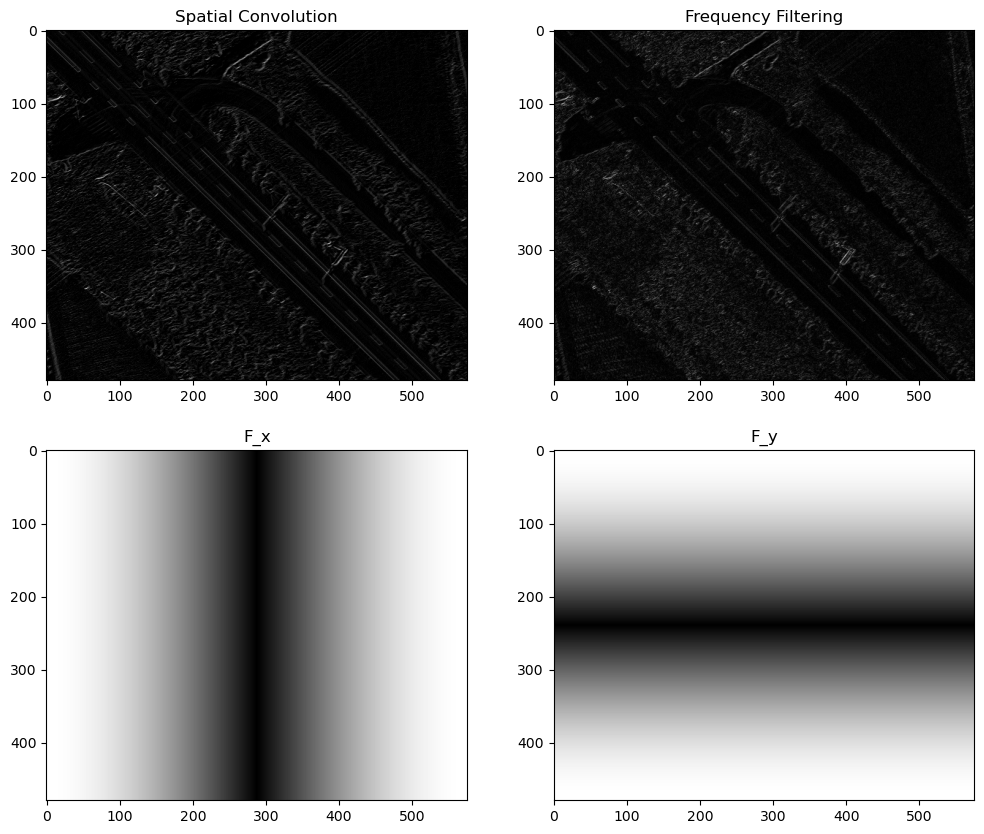

In [15]:
f_x=np.array([[1,-1]])
f_y=np.array([[1],[-1]])
spatial_conv_img=spatial_conv(img,f_x,f_y)
frequency_filter_img, F_x, F_y=frequency_filter(img,f_x,f_y)
plt.figure(figsize=(12, 10))
plt.subplot(221)
plt.imshow(spatial_conv_img, cmap='gray')
plt.title('Spatial Convolution')
plt.subplot(222)
plt.imshow(frequency_filter_img, cmap='gray')
plt.title('Frequency Filtering')
plt.subplot(223)
plt.imshow(np.abs(F_x), cmap='gray')
plt.title('F_x')
plt.subplot(224)
plt.imshow(np.abs(F_y), cmap='gray')
plt.title('F_y')


##### 实验收获与感悟
- 请在这里给出你对本次实验的收获与感悟，可以是对本次实验的建议，也可以是对本次实验的心得体会。
    + 本次学习任务：图像增强，边缘检测，滤波器
        + 图像增强的一般方法：直方图拉伸法；直方图均衡化
        + 边缘检测的一般方法：Roberts, Sobel, Prewitt, laplacian
            + 思路：一个kernel计算梯度，梯度达到阈值即为边界
        + 滤波器：butterworth滤波器，计算公式，与距离有关
    
- 证明：

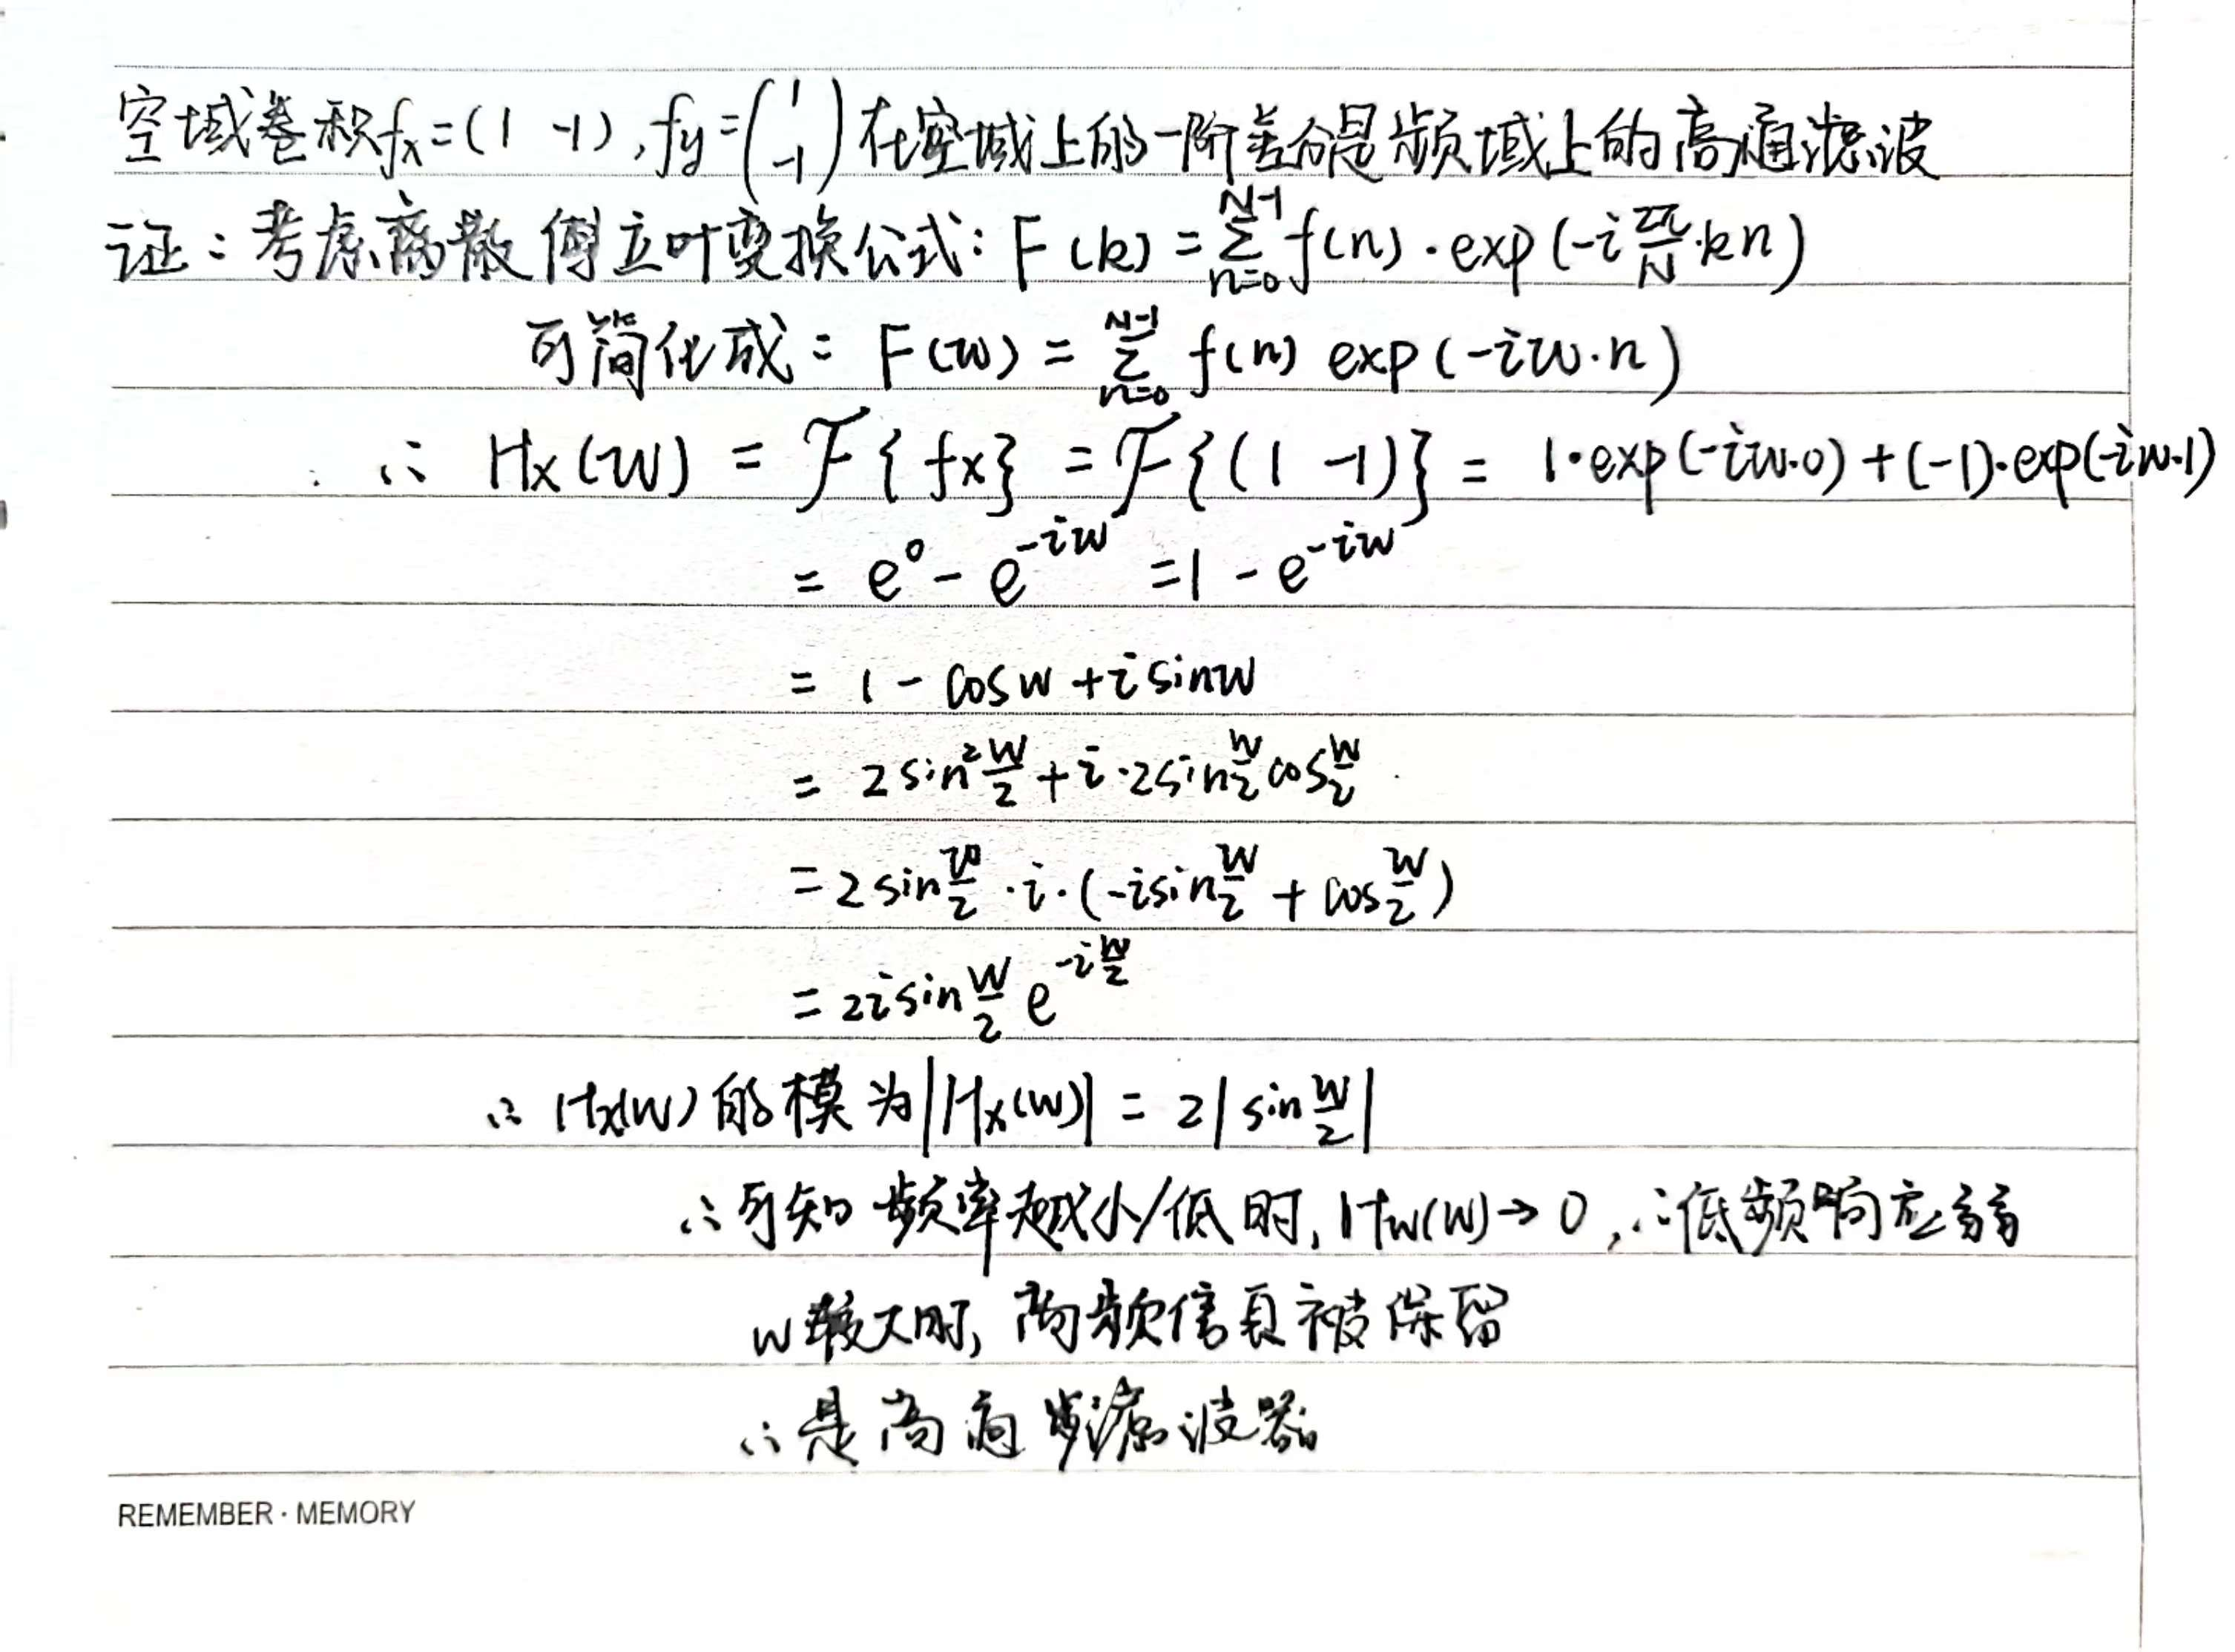
  